# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardai
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | bahia de kino
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | pangody
Processing Record 9 of Set 1 | opuwo
Processing Record 10 of Set 1 | puerto deseado
Processing Record 11 of Set 1 | timmins
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | palora
Processing Record 15 of Set 1 | nha trang
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | kismayo
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | onega
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | punta del este
Processing 

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bardai,11.6500,7.2333,21.76,93,96,3.17,NG,1724620279
1,hermanus,-34.4187,19.2345,12.27,70,89,5.87,ZA,1724620347
2,udachny,66.4167,112.4000,7.07,89,65,2.50,RU,1724620349
3,invercargill,-46.4000,168.3500,3.34,98,100,1.34,NZ,1724620350
4,bahia de kino,28.8333,-111.9333,33.80,39,3,4.35,MX,1724620351


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,21.76,93,96,3.17,NG,1724620279
1,hermanus,-34.4187,19.2345,12.27,70,89,5.87,ZA,1724620347
2,udachny,66.4167,112.4000,7.07,89,65,2.50,RU,1724620349
3,invercargill,-46.4000,168.3500,3.34,98,100,1.34,NZ,1724620350
4,bahia de kino,28.8333,-111.9333,33.80,39,3,4.35,MX,1724620351


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

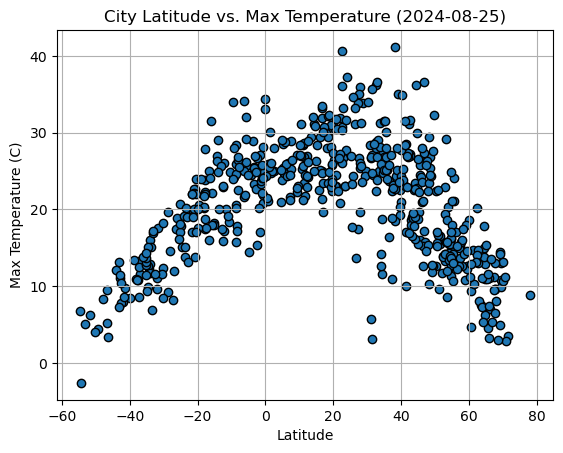

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024-08-25)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

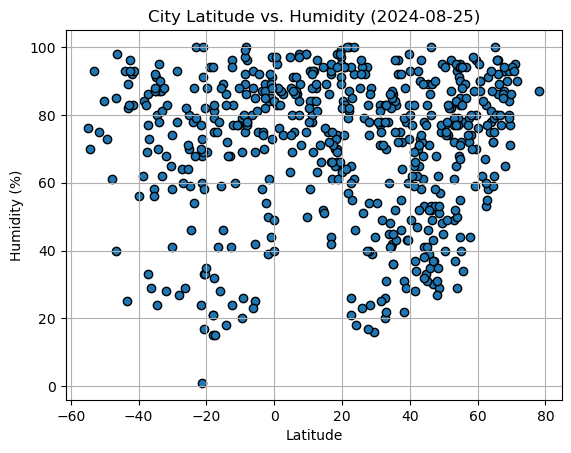

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-08-25)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

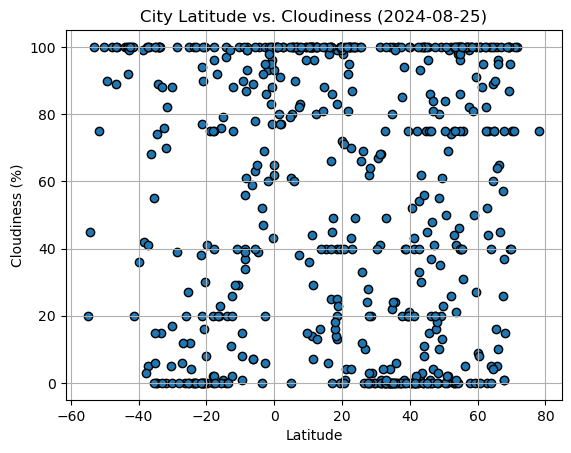

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-08-25)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

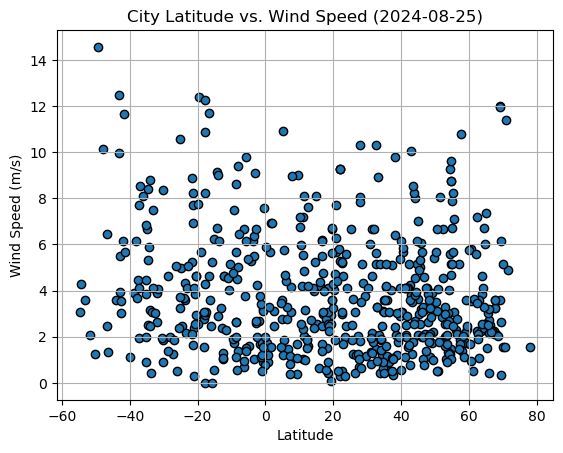

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-08-25)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot (x,y,title,xlabel,ylabel):
    #perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept

    #create the scatter plot
    plt.scatter(x,y)

    #add the regression line
    plt.plot(x,regress_values,"r-")

    # add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    #add the equation of the line and r-squared value as text in the plot and format
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(5.8,0.8,line_eq,fontsize=15,color="red")

    #print the r^2 value
    print(f"The r-squared value is: {rvalue**2}")

    #show the plot
    plt.show()

#from xpert learning assist, used later in assignment
# x_data = [1, 2, 3, 4, 5]
# y_data = [2, 3, 4, 5, 6]
# create_linear_regression_plot(x_data, y_data, 'Linear Regression Plot', 'X-axis', 'Y-axis')

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,21.76,93,96,3.17,NG,1724620279
2,udachny,66.4167,112.4000,7.07,89,65,2.50,RU,1724620349
4,bahia de kino,28.8333,-111.9333,33.80,39,3,4.35,MX,1724620351
7,pangody,65.8500,74.4859,11.12,80,5,2.74,RU,1724620355
10,timmins,48.4669,-81.3331,26.77,51,80,1.12,CA,1724620079


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,12.27,70,89,5.87,ZA,1724620347
3,invercargill,-46.4000,168.3500,3.34,98,100,1.34,NZ,1724620350
5,port elizabeth,-33.9180,25.5701,12.95,95,100,3.14,ZA,1724620244
6,bredasdorp,-34.5322,20.0403,9.95,80,74,2.50,ZA,1724620353
8,opuwo,-18.0607,13.8400,20.18,15,0,2.77,NaN,1724620356


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.4606652313857979


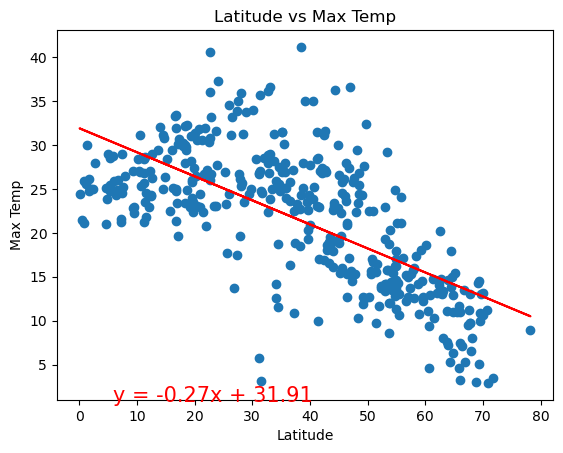

In [48]:
# Linear regression on Northern Hemisphere

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                              "Latitude vs Max Temp", "Latitude", "Max Temp")

The r-squared value is: 0.706906930449036


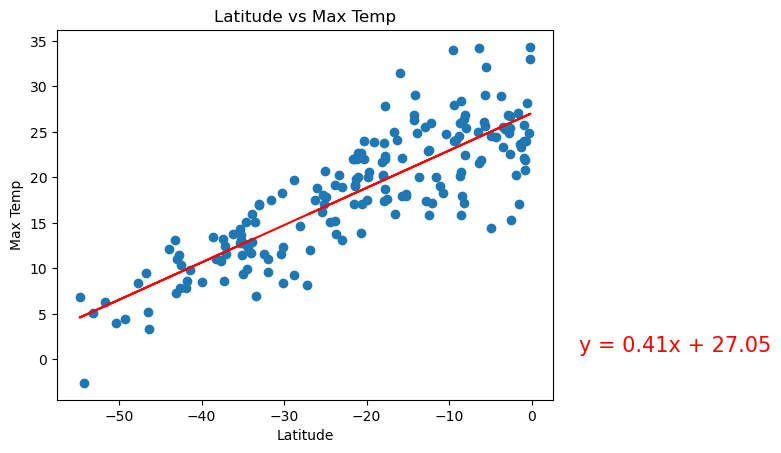

In [49]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                              "Latitude vs Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** 
****************************************************************
In the Northern Hempisphere, as latitude increases or goes north, the max temperature decreases. With an r-squared value of 0.46, the correlation between latitude and max temperature is weak in the Northern Hempisphere.
****************************************************************
However, latitude and max temperature have an r-squared value of 0.71 in the Souther Hempisphere which indicates a strong correlation between them. In the Southern Hempisphere, as latitude increases (gets closer to zero, meaning closer to the equator), the max temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.0018794584323533789


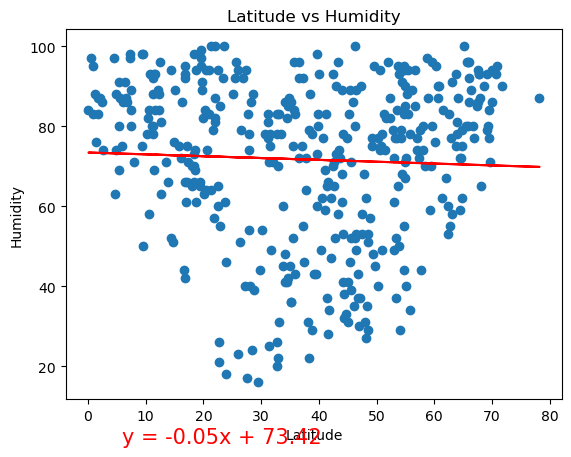

In [51]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                              "Latitude vs Humidity", "Latitude", "Humidity")

The r-squared value is: 0.0017214769418953048


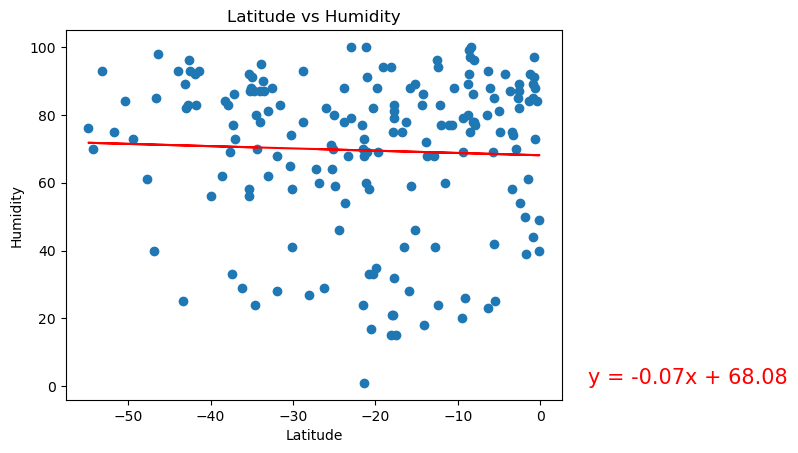

In [52]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                              "Latitude vs Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** 
****************************************************************
For both the Northern and Southern Hempispheres, there does not seem to be a correlation between Latitude and Humidity. Their r-squared values are .0019 and .0017 respectively which does not indicate a relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.008619024590801124


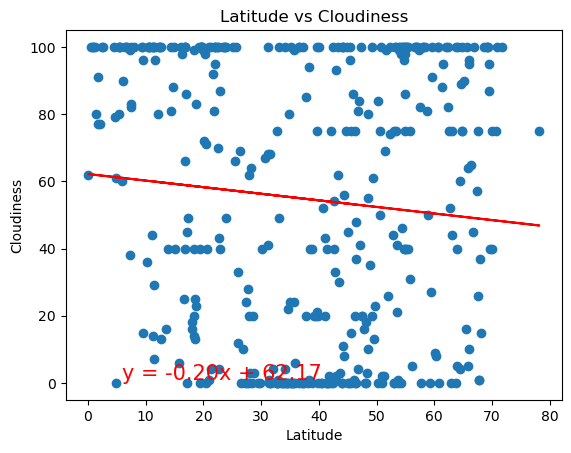

In [53]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                              "Latitude vs Cloudiness", "Latitude", "Cloudiness")

The r-squared value is: 0.0010908109303034202


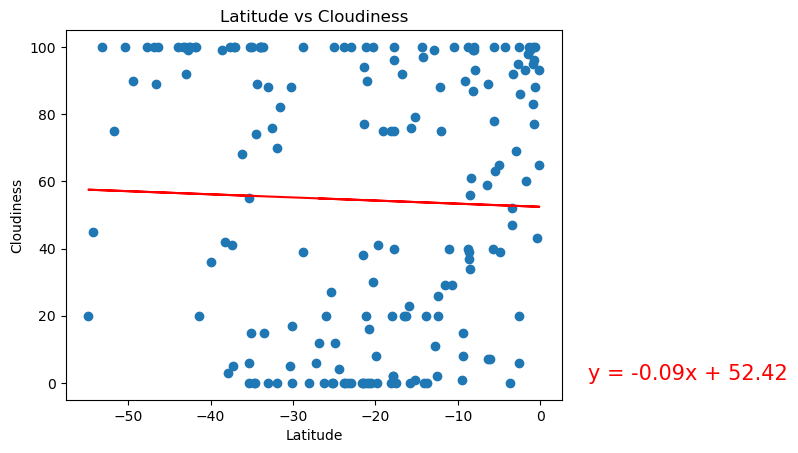

In [54]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                              "Latitude vs Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
****************************************************************
For both the Northern and Southern Hempispheres, there does not seem to be a correlation between Latitude and Cloudiness. Their r-squared values are .0009 and .0011 respectively which do not indicate a relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 8.652726799950579e-05


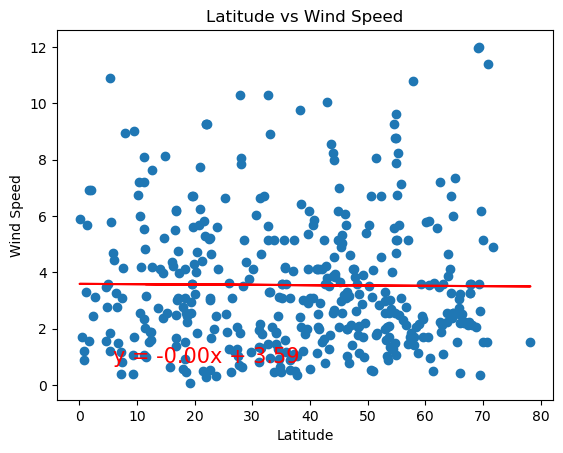

In [55]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                              "Latitude vs Wind Speed", "Latitude", "Wind Speed")

The r-squared value is: 0.027649255685208127


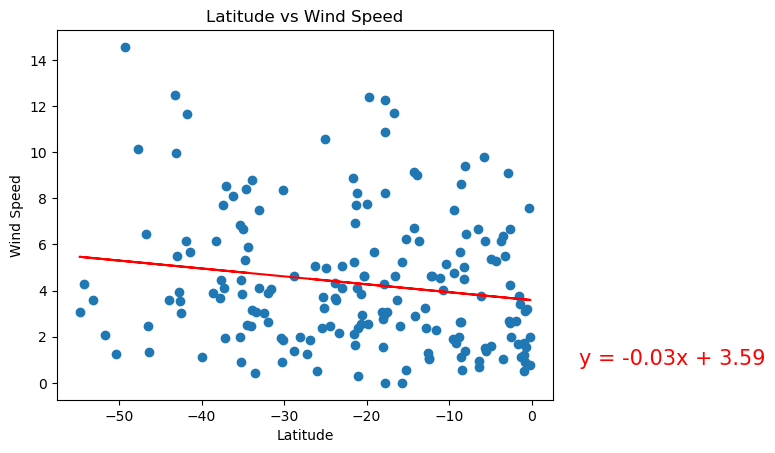

In [56]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                              "Latitude vs Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 
********************
Like cloudiness and humidity, wind speed does not seem to have a correlation to latitude either. In the Northern Hempisphere, the r-squared value is .00008 which is so insignificant that the slope of the line in the scatter plot is 0.00. The r-squared value for the wind speed data in the Southern Hemisphere, is much greater at 0.028, however, this shows a very weak or non existent relationship at best.